In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import random 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/Project%20Clustering/datasets_1901_3285_College.csv'
df = pd.read_csv(url)

#https://www.kaggle.com/flyingwombat/us-news-and-world-reports-college-data

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch

# 2-18

In [8]:
df.sample(5)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
283,John Carroll University,Yes,2421,2109,820,27,57,3168,392,11700,5550,600,450,89,90,14.5,28,7738,89
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
289,Kansas Wesleyan University,Yes,589,575,148,16,40,474,258,8400,3250,500,1400,63,55,12.4,14,6535,68
201,Florida International University,No,3306,2079,1071,42,89,10208,9310,6597,2494,800,3028,81,96,13.9,20,6722,66
236,Greenville College,Yes,510,387,194,20,46,771,53,10310,4530,400,800,57,61,14.3,16,8222,60


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [10]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


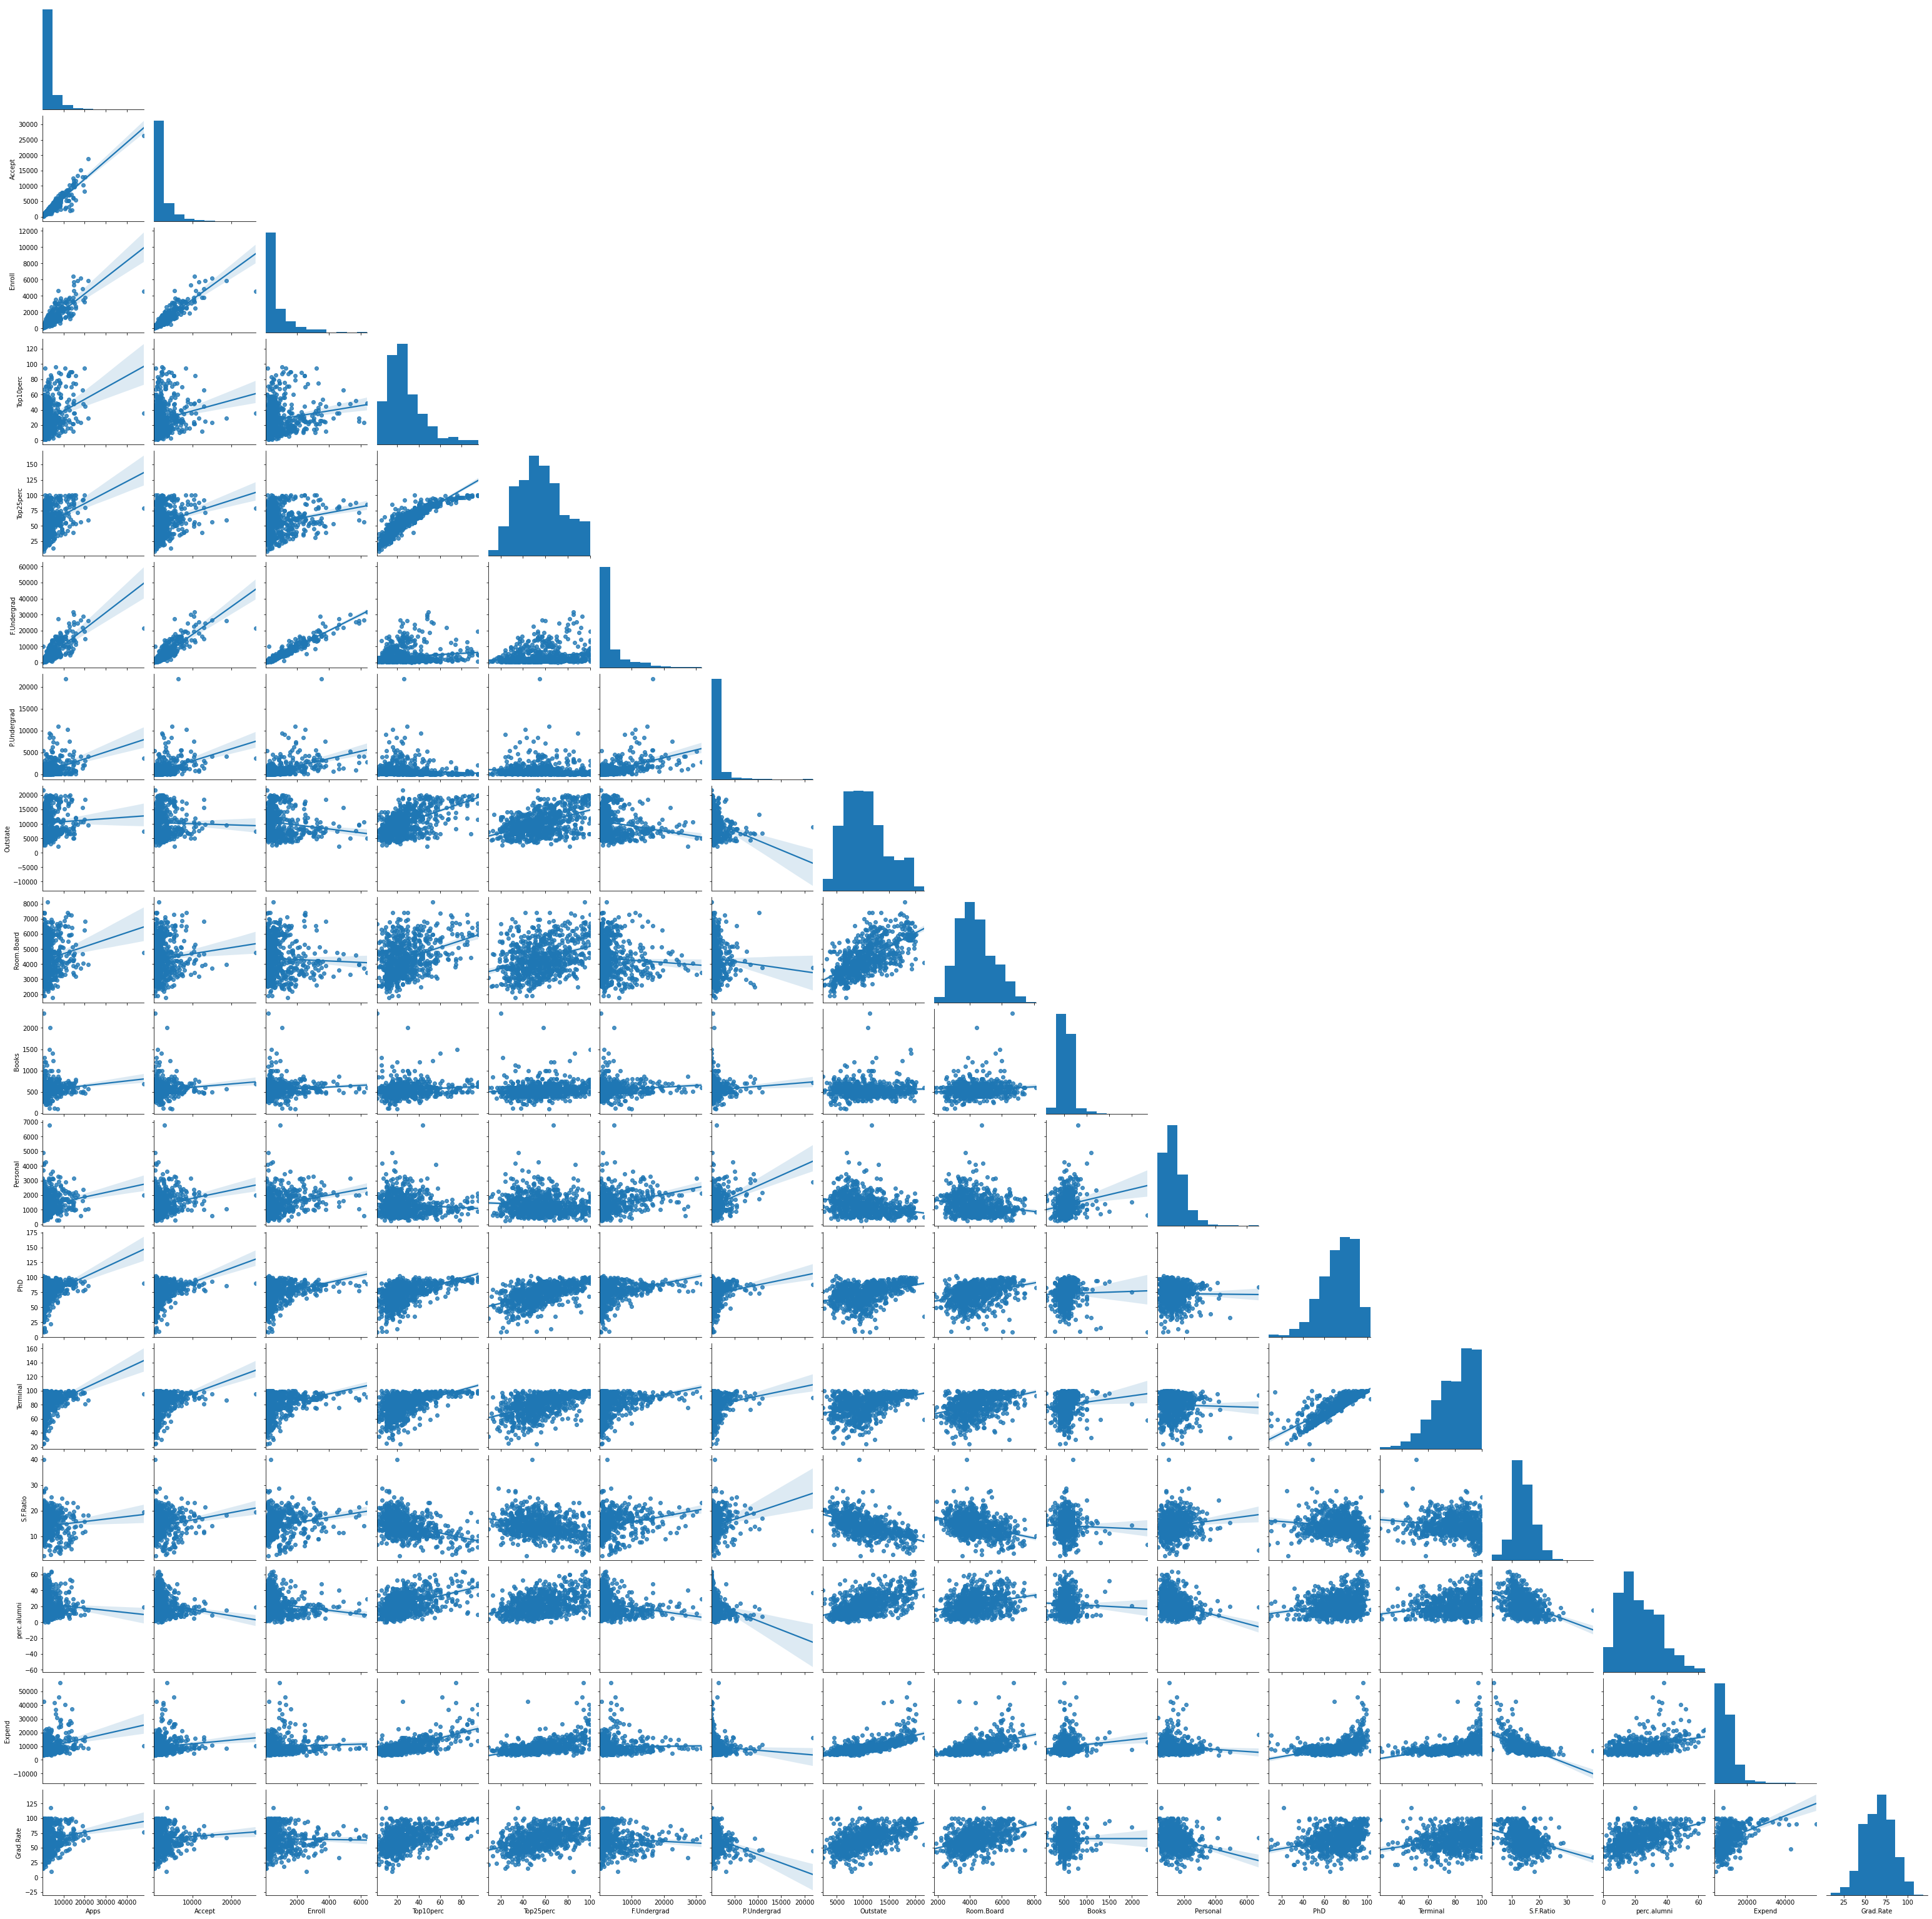

In [11]:
sns.pairplot(df,kind='reg',corner=True)

In [12]:
df.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


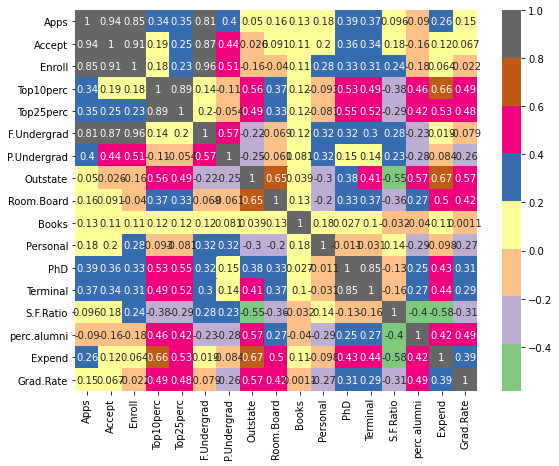

In [13]:
fig = plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='Accent',annot= True)

In [14]:
so = df.corr().unstack().sort_values(kind="quicksort")

dfa = pd.DataFrame(so)
dfb = dfa[dfa.iloc[:,0] != 1] #ตัดค่าที่เป็น 1 ออก
dfb

0
Expend      S.F.Ratio   -0.583832
S.F.Ratio   Expend      -0.583832
            Outstate    -0.554821
Outstate    S.F.Ratio   -0.554821
perc.alumni S.F.Ratio   -0.402929
...                           ...
Enroll      Accept       0.911637
Apps        Accept       0.943451
Accept      Apps         0.943451
Enroll      F.Undergrad  0.964640
F.Undergrad Enroll       0.964640

[272 rows x 1 columns]

In [15]:
#หาค่า corr() ที่ใกล้ 0 ที่สุด
dfb.abs().sort_values(by = dfb.columns[0]).head(2)

,,0
Grad.Rate,Books,0.001061
Books,Grad.Rate,0.001061


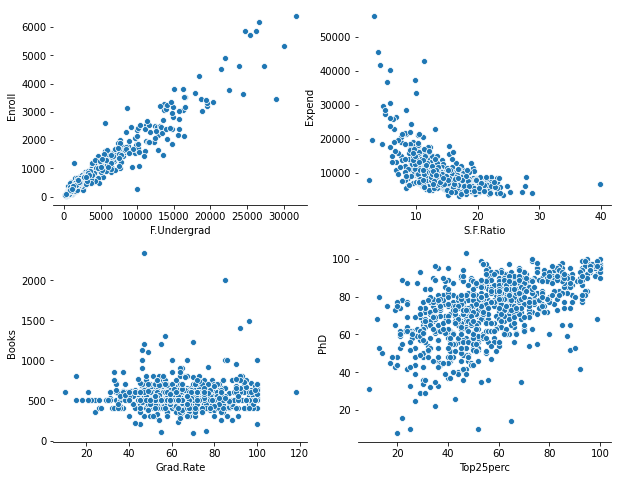

In [16]:
f, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=False)
sns.despine(left=True)

sns.scatterplot(x=df.iloc[:,7],y=df.iloc[:,4],data=df, ax=axes[0, 0]) #max corr
sns.scatterplot(x=df.iloc[:,15],y=df.iloc[:,17],data=df, ax=axes[0, 1])#min corr
sns.scatterplot(x=df.iloc[:,18],y=df.iloc[:,11],data=df, ax=axes[1, 0]) # corr -> 0
sns.scatterplot(x=df.iloc[:,6],y=df.iloc[:,13],data=df, ax=axes[1, 1])

In [17]:
fig = plt.figure(figsize=(8,6))
px.box(df,y = df.iloc[:,2])

<Figure size 576x432 with 0 Axes>

In [18]:
df.iloc[:,2] = [7888 if x>7888 else x for x in df.iloc[:,2]]
px.box(df,y = df.iloc[:,2])

# 19 Min-Max Normalization 

In [19]:
df_real = pd.get_dummies(df.drop(df.columns[0],axis=1),drop_first=True)

In [20]:
df_real

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
775,7888,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


In [21]:
min_max_sc = MinMaxScaler()

In [22]:
df_mm = min_max_sc.fit_transform(df_real)
df_nor = pd.DataFrame(df_mm,columns=df_real.columns)

In [23]:
df_nor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    float64
 1   Accept       777 non-null    float64
 2   Enroll       777 non-null    float64
 3   Top10perc    777 non-null    float64
 4   Top25perc    777 non-null    float64
 5   F.Undergrad  777 non-null    float64
 6   P.Undergrad  777 non-null    float64
 7   Outstate     777 non-null    float64
 8   Room.Board   777 non-null    float64
 9   Books        777 non-null    float64
 10  Personal     777 non-null    float64
 11  PhD          777 non-null    float64
 12  Terminal     777 non-null    float64
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    float64
 15  Expend       777 non-null    float64
 16  Grad.Rate    777 non-null    float64
 17  Private_Yes  777 non-null    float64
dtypes: float64(18)
memory usage: 109.4 KB


# 20-22 และ 34-37 เลือกฟีเจอร์ Apps, Accept

In [24]:
X = df_nor.iloc[:,[0,1]]

## 21-22 K-Means

### 21-22 หาค่า Cluster Centers, Inertia, n_iter สร้าง Clustering Visualization และจุด Centroids







In [25]:
kmeans = KMeans(n_clusters=2 , random_state= 100)

In [26]:
y_predict = kmeans.fit_predict(X)

In [27]:
kmeans.cluster_centers_

array([[0.16679744, 0.0365719 ],
       [0.82336222, 0.19874684]])

In [28]:
kmeans.inertia_

18.106622410913886

In [29]:
kmeans.n_iter_

8

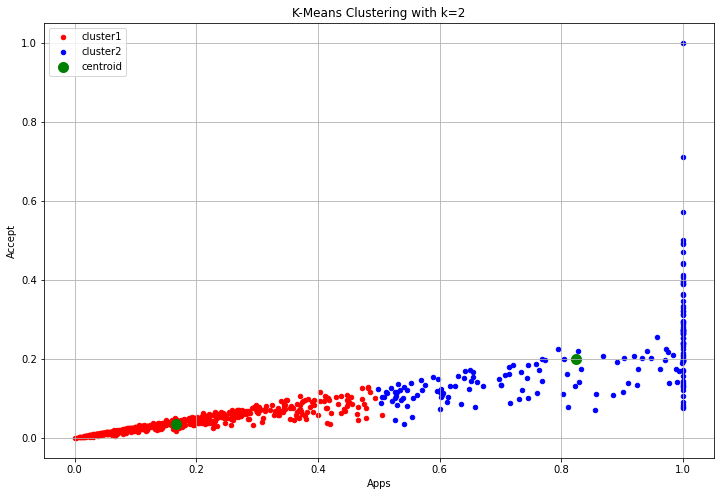

In [30]:
x1 = X[y_predict == 0].iloc[:,[0]]
y1 = X[y_predict == 0].iloc[:,[1]]
x2 = X[y_predict == 1].iloc[:,[0]]
y2 = X[y_predict == 1].iloc[:,[1]]

fig = plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='red',label = 'cluster1')
plt.scatter(x2,y2,s=20,c='blue',label = 'cluster2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='green',label = 'centroid')
plt.title('K-Means Clustering with k=2')
plt.xlabel('Apps')
plt.ylabel('Accept')
plt.legend()
plt.grid()

### 23-26 Elbow Method Visualization

Text(0, 0.5, 'wcss')

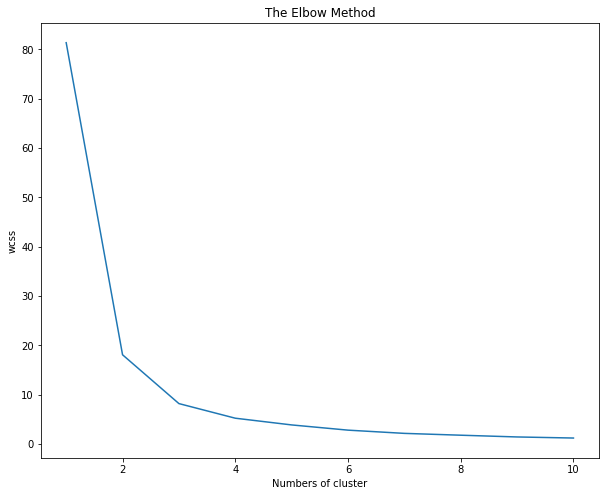

In [31]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i,random_state=100)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

fig = plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Numbers of cluster')
plt.ylabel('wcss')

หาค่า Cluster Centers, Inertia, n_iter สร้าง Clustering Visualization และจุด Centroids กำหนดให้ n_clusters = 3

In [32]:
kmeans = KMeans(n_clusters=3 , random_state= 100)

In [33]:
y_predict = kmeans.fit_predict(X)

In [34]:
kmeans.cluster_centers_

array([[0.44017579, 0.08947341],
       [0.1185861 , 0.02722264],
       [0.93150455, 0.23520451]])

In [35]:
kmeans.inertia_

8.212638798874403

In [36]:
kmeans.n_iter_

4

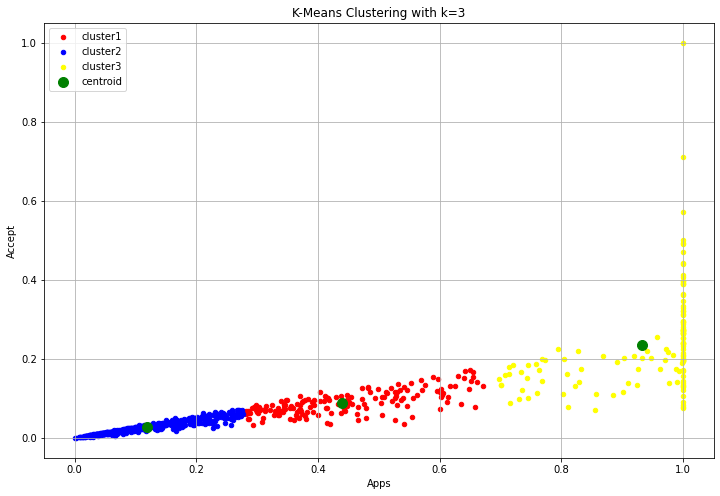

In [37]:
x1 = X[y_predict == 0].iloc[:,[0]]
y1 = X[y_predict == 0].iloc[:,[1]]
x2 = X[y_predict == 1].iloc[:,[0]]
y2 = X[y_predict == 1].iloc[:,[1]]
x3 = X[y_predict == 2].iloc[:,[0]]
y3 = X[y_predict == 2].iloc[:,[1]]

fig = plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='red',label = 'cluster1')
plt.scatter(x2,y2,s=20,c='blue',label = 'cluster2')
plt.scatter(x3,y3,s=20,c='yellow',label = 'cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='green',label = 'centroid')
plt.title('K-Means Clustering with k=3')
plt.xlabel('Apps')
plt.ylabel('Accept')
plt.legend()
plt.grid()

##34-37 Hierarchical

34-37

Text(0.5, 1.0, 'dendrogram of Apps vs Accept')

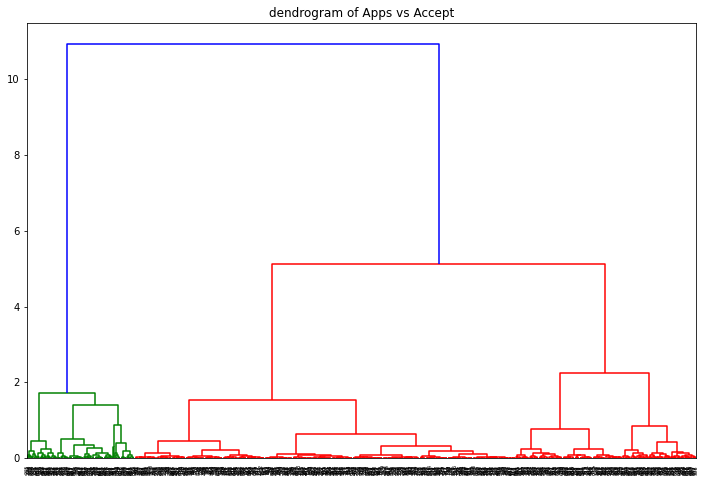

In [38]:
fig = plt.figure(figsize =(12,8))
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('dendrogram of Apps vs Accept')

### กำหนดให้ n_clusters=3 เพื่อเทียบกับ K-Means ทำ Elbow Method และกำหนด n_clusters=3

In [39]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [40]:
y_predict = hc.fit_predict(X)

<Figure size 864x576 with 0 Axes>

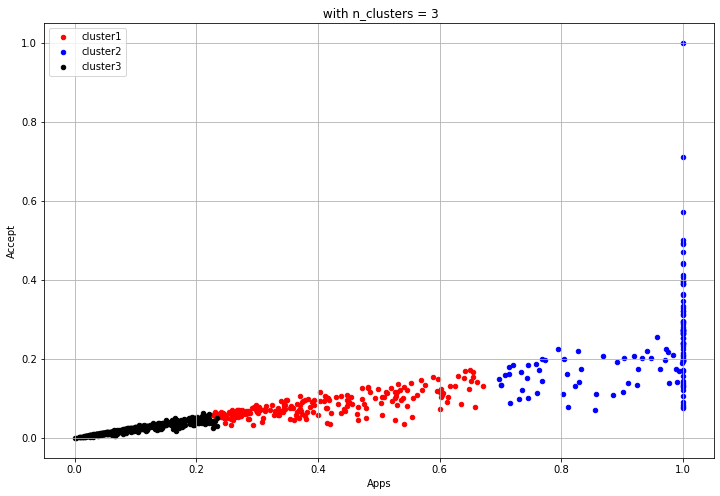

In [41]:
fig = plt.figure(figsize=(12,8))

x1 = X[y_predict == 0].iloc[:,[0]]
y1 = X[y_predict == 0].iloc[:,[1]]
x2 = X[y_predict == 1].iloc[:,[0]]
y2 = X[y_predict == 1].iloc[:,[1]]
x3 = X[y_predict == 2].iloc[:,[0]]
y3 = X[y_predict == 2].iloc[:,[1]]

fig = plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='red',label = 'cluster1')
plt.scatter(x2,y2,s=20,c='blue',label = 'cluster2')
plt.scatter(x3,y3,s=20,c='black',label = 'cluster3')


plt.title(' with n_clusters = 3')
plt.xlabel('Apps')
plt.ylabel('Accept')
plt.legend()
plt.grid()

# 27-29 และ 38-41 เลือกฟีเจอร์ Top25perc, Outstate

In [42]:
X = df_nor.iloc[:,[4,7]]

## 28-29 K-Means

### 28-29 หาค่า Cluster Centers, Inertia, n_iter สร้าง Clustering Visualization และจุด Centroids

In [43]:
kmeans = KMeans(n_clusters=2 , random_state= 100)

In [44]:
y_predict = kmeans.fit_predict(X)

In [45]:
kmeans.cluster_centers_

array([[0.39462363, 0.30982055],
       [0.72190837, 0.60694768]])

In [46]:
kmeans.inertia_

35.05348524905865

In [47]:
kmeans.n_iter_

5

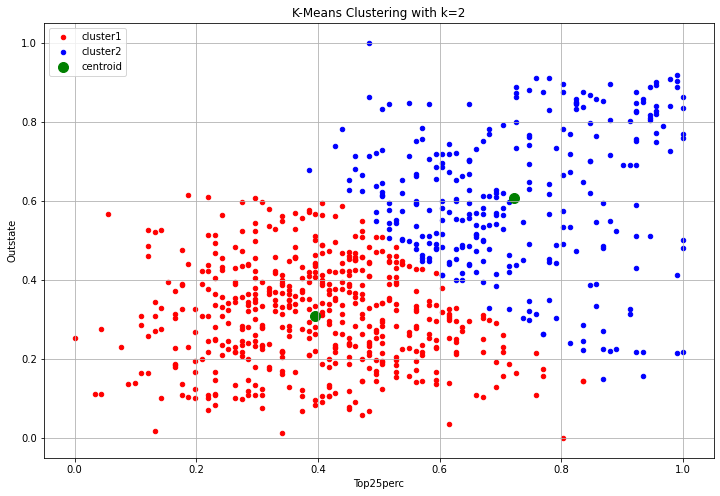

In [48]:
x1 = X[y_predict == 0].iloc[:,[0]]
y1 = X[y_predict == 0].iloc[:,[1]]
x2 = X[y_predict == 1].iloc[:,[0]]
y2 = X[y_predict == 1].iloc[:,[1]]

fig = plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='red',label = 'cluster1')
plt.scatter(x2,y2,s=20,c='blue',label = 'cluster2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='green',label = 'centroid')
plt.title('K-Means Clustering with k=2')
plt.xlabel('Top25perc')
plt.ylabel('Outstate')
plt.legend()
plt.grid()

### 31-33 Elbow Method Visualization

Text(0, 0.5, 'wcss')

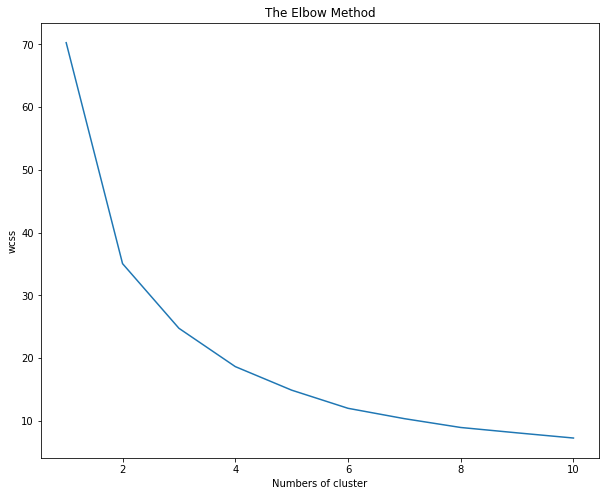

In [49]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i,random_state=100)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

fig = plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Numbers of cluster')
plt.ylabel('wcss')

หาค่า Cluster Centers, Inertia, n_iter สร้าง Clustering Visualization และจุด Centroids กำหนดให้ n_clusters = 4

In [50]:
kmeans = KMeans(n_clusters=4 , random_state= 100)

In [51]:
y_predict = kmeans.fit_predict(X)

In [52]:
kmeans.cluster_centers_

array([[0.85249366, 0.75435623],
       [0.30087154, 0.30084711],
       [0.62410714, 0.24073735],
       [0.55516681, 0.54214343]])

In [53]:
kmeans.inertia_

18.646584816546554

In [54]:
kmeans.n_iter_

12

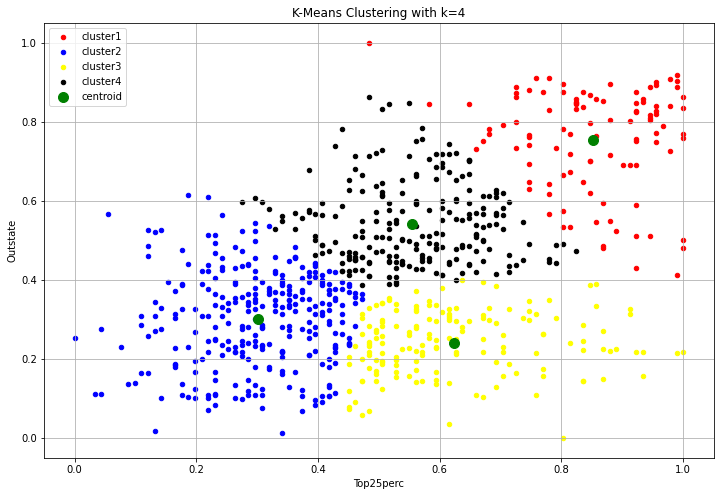

In [55]:
x1 = X[y_predict == 0].iloc[:,[0]]
y1 = X[y_predict == 0].iloc[:,[1]]
x2 = X[y_predict == 1].iloc[:,[0]]
y2 = X[y_predict == 1].iloc[:,[1]]
x3 = X[y_predict == 2].iloc[:,[0]]
y3 = X[y_predict == 2].iloc[:,[1]]
x4 = X[y_predict == 3].iloc[:,[0]]
y4 = X[y_predict == 3].iloc[:,[1]]

fig = plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='red',label = 'cluster1')
plt.scatter(x2,y2,s=20,c='blue',label = 'cluster2')
plt.scatter(x3,y3,s=20,c='yellow',label = 'cluster3')
plt.scatter(x4,y4,s=20,c='black',label = 'cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='green',label = 'centroid')
plt.title('K-Means Clustering with k=4')
plt.xlabel('Top25perc')
plt.ylabel('Outstate')
plt.legend()
plt.grid()

## 38-41 Hierarchical

Text(0.5, 1.0, 'dendrogram of Top25perc vs Outstate')

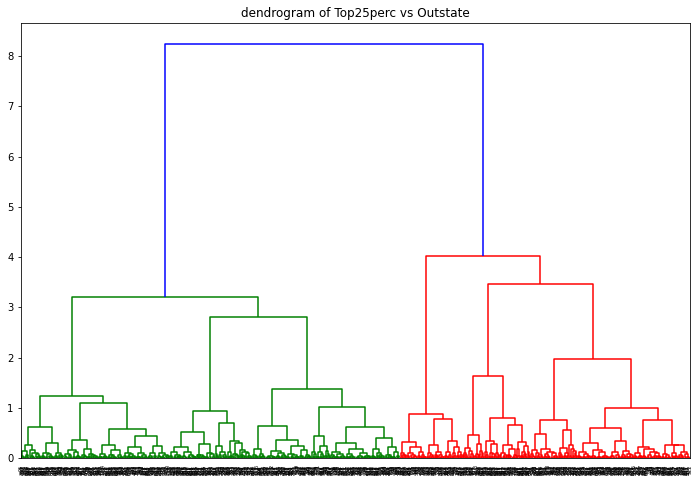

In [56]:
fig = plt.figure(figsize =(12,8))
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('dendrogram of Top25perc vs Outstate')

###43 กำหนดให้ n_clusters=4 เพื่อเทียบกับ K-Means ทำ Elbow Method และกำหนด n_clusters=4




In [57]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [58]:
y_predict = hc.fit_predict(X)

<Figure size 864x576 with 0 Axes>

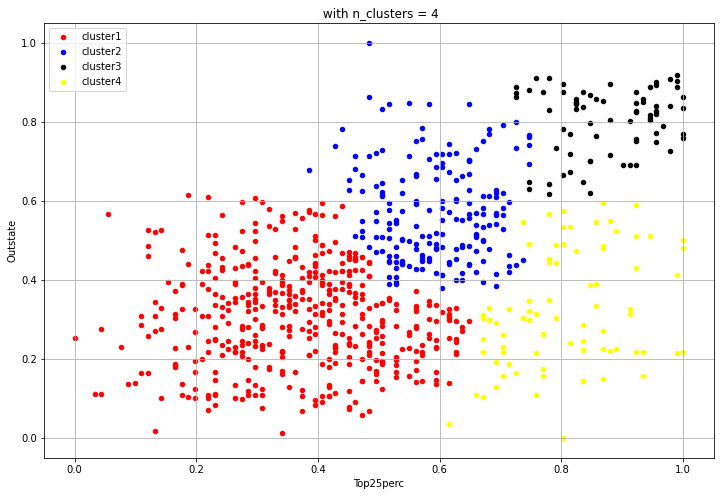

In [59]:
fig = plt.figure(figsize=(12,8))

x1 = X[y_predict == 0].iloc[:,[0]]
y1 = X[y_predict == 0].iloc[:,[1]]
x2 = X[y_predict == 1].iloc[:,[0]]
y2 = X[y_predict == 1].iloc[:,[1]]
x3 = X[y_predict == 2].iloc[:,[0]]
y3 = X[y_predict == 2].iloc[:,[1]]
x4 = X[y_predict == 3].iloc[:,[0]]
y4 = X[y_predict == 3].iloc[:,[1]]

fig = plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='red',label = 'cluster1')
plt.scatter(x2,y2,s=20,c='blue',label = 'cluster2')
plt.scatter(x3,y3,s=20,c='black',label = 'cluster3')
plt.scatter(x4,y4,s=20,c='yellow',label = 'cluster4')

plt.title(' with n_clusters = 4')
plt.xlabel('Top25perc')
plt.ylabel('Outstate')
plt.legend()
plt.grid()

### 40 จาก dendrogram กำหนดให้ n_clusters=*6* 

In [60]:
hc = AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')

In [61]:
y_predict = hc.fit_predict(X)

<Figure size 864x576 with 0 Axes>

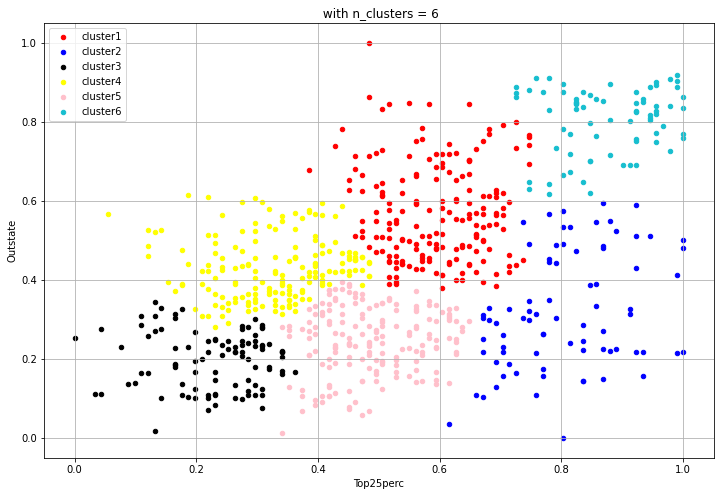

In [62]:
fig = plt.figure(figsize=(12,8))

x1 = X[y_predict == 0].iloc[:,[0]]
y1 = X[y_predict == 0].iloc[:,[1]]
x2 = X[y_predict == 1].iloc[:,[0]]
y2 = X[y_predict == 1].iloc[:,[1]]
x3 = X[y_predict == 2].iloc[:,[0]]
y3 = X[y_predict == 2].iloc[:,[1]]
x4 = X[y_predict == 3].iloc[:,[0]]
y4 = X[y_predict == 3].iloc[:,[1]]
x5 = X[y_predict == 4].iloc[:,[0]]
y5 = X[y_predict == 4].iloc[:,[1]]
x6 = X[y_predict == 5].iloc[:,[0]]
y6 = X[y_predict == 5].iloc[:,[1]]

fig = plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='red',label = 'cluster1')
plt.scatter(x2,y2,s=20,c='blue',label = 'cluster2')
plt.scatter(x3,y3,s=20,c='black',label = 'cluster3')
plt.scatter(x4,y4,s=20,c='yellow',label = 'cluster4')
plt.scatter(x5,y5,s=20,c='pink',label = 'cluster5')
plt.scatter(x6,y6,s=20,c='#17becf',label = 'cluster6')

plt.title(' with n_clusters = 6')
plt.xlabel('Top25perc')
plt.ylabel('Outstate')
plt.legend()
plt.grid()

## 42 ฟีเจอร์ Apps, Accept ไม่เหมาะกับการเอามาทำ clustering ส่วนฟีเจอร์ Top25perc, Outstate ถ้ากำหนดจำนวน n_clusters ที่เท่ากัน (เท่ากับ 4) K Means ให้ผลออกมาได้ดีกว่า Hierarchical Clustering โดยดูจากจุดที่แบ่ง

## K Means แบ่งกลุ่มได้เป็นระเบียบกว่า Hierarchical Clustering